In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv")
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
df_test = pd.read_csv("Google_Stock_Price_Test.csv")
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [5]:
train = df_train.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
train.shape

(1258, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
mms = MinMaxScaler()

In [9]:
train_scaled = mms.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

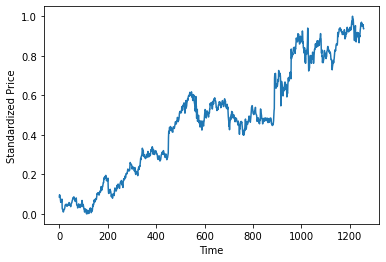

In [11]:
plt.plot(train_scaled)
plt.xlabel("Time")
plt.ylabel("Standardized Price")
plt.show()

In [12]:
x_train, y_train = [], []
time=60

In [13]:
for i in range(time,train_scaled.shape[0]):
    x_train.append(train_scaled[i-time:i,0])
    y_train.append(train_scaled[i,0])

In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [15]:
x_train.shape, y_train.shape

((1198, 60), (1198,))

In [16]:
x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1198, 60, 1)

In [17]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

In [18]:
model = Sequential()

In [20]:
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5

In [57]:
model.fit(x_train, y_train, epochs=100, batch_size=30, validation_split=0.05)

Epoch 1/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 2/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 3/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0041 - val_loss: 8.9138e-04
Epoch 4/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0039 - val_loss: 6.2088e-04
Epoch 5/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0039 - val_loss: 8.4965e-04
Epoch 6/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0038 - val_loss: 6.1680e-04
Epoch 7/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0038 - val_loss: 8.2645e-04
Epoch 8/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0036 - val_loss: 5.9387e-04
Epoch 9/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0037 - val_loss: 7.4028e-04
Epoch 10/100
38/38 [==============================] - 3s 72ms/step - los

38/38 [==============================] - 3s 72ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 81/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 82/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0018 - val_loss: 8.6238e-04
Epoch 83/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 84/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0016 - val_loss: 8.2120e-04
Epoch 85/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 86/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 87/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 88/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 89/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0015 - val_loss: 0.

In [58]:
data = pd.concat((df_train['Open'], df_test['Open']), axis=0)
data

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [59]:
test = data.iloc[len(data)-len(df_test)-time:].values
test.shape

(80,)

In [60]:
test = test.reshape(-1,1)

In [61]:
test_scaled = mms.fit_transform(test)
test_scaled.shape

(80, 1)

In [62]:
x_test = []
y_test = df_test.loc[:,['Open']].values

In [63]:
y_test

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [64]:
y_test.shape

(20, 1)

In [65]:
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i-time:i,0])

In [66]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [67]:
x_test.shape, y_test.shape

((20, 60), (20, 1))

In [68]:
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [69]:
output = model.evaluate(x =x_test, y=y_test)

1/1 [==============================] - 0s 20ms/step - loss: 651318.6250


In [70]:
y_pred = model.predict(x_test)

In [71]:
y_pred = mms.inverse_transform(y_pred)

In [72]:
y_pred

array([[786.67224],
       [783.56067],
       [782.8422 ],
       [785.4193 ],
       [790.6388 ],
       [796.8053 ],
       [800.7686 ],
       [801.23303],
       [801.22314],
       [802.3079 ],
       [804.0574 ],
       [804.6067 ],
       [803.5211 ],
       [802.7345 ],
       [803.3196 ],
       [808.05133],
       [814.56714],
       [820.90784],
       [824.4552 ],
       [822.51276]], dtype=float32)

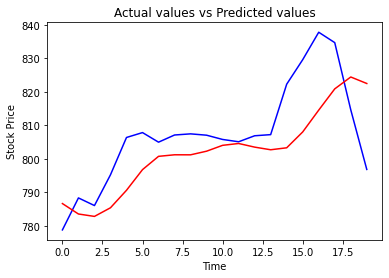

In [73]:
plt.plot(y_test, color='blue', label="Actual values")
plt.plot(y_pred, color='red', label="Predicted values")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual values vs Predicted values")
plt.show()